# 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
# 불만족이 1, 만족이 0

print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df['var3'].value_counts( )[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
# X_features 컬럼은 처음부터 ~ 맨 마지막 두번째까지
X_features = cust_df.iloc[:, :-1]

# y_labels 컬럼은 맨 마지막 하나.
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

# train_test_split(stratify=y_labels) 하면 분포도를 맞춰준다. 
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
# 원래는 test를 이용하면 안돼!
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



/Users/terrydawunhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [9]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)

gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/terrydawunhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72255	validation_1-auc:0.72640
[1]	validation_0-auc:0.74625	validation_1-auc:0.75051
[2]	validation_0-auc:0.81675	validation_1-auc:0.81906
[3]	validation_0-auc:0.82734	validation_1-auc:0.82620
[4]	validation_0-auc:0.83559	validation_1-auc:0.83410
[5]	validation_0-auc:0.83854	validation_1-auc:0.83449
[6]	validation_0-auc:0.83653	validation_1-auc:0.83319
[7]	validation_0-auc:0.84281	validation_1-auc:0.83717
[8]	validation_0-auc:0.84240	validation_1-auc:0.83435
[9]	validation_0-auc:0.84139	validation_1-auc:0.83315
[10]	validation_0-auc:0.84795	validation_1-auc:0.83874
[11]	validation_0-auc:0.85114	validation_1-auc:0.84039
[12]	validation_0-auc:0.85300	validation_1-auc:0.84080
[13]	validation_0-auc:0.85371	validation_1-auc:0.84205
[14]	validation_0-auc:0.85534	validation_1-auc:0.84046
[15]	validation_0-auc:0.85838	validation_1-auc:0.84232
[16]	validation_0-auc:0.85907	validation_1-auc:0.84237
[17]	validation_0-auc:0.86128	validation_1-auc:0.84349
[18]	validation_0-au

[12]	validation_0-auc:0.85662	validation_1-auc:0.84253
[13]	validation_0-auc:0.85735	validation_1-auc:0.84213
[14]	validation_0-auc:0.85876	validation_1-auc:0.84083
[15]	validation_0-auc:0.86128	validation_1-auc:0.84240
[16]	validation_0-auc:0.86235	validation_1-auc:0.84146
[17]	validation_0-auc:0.86367	validation_1-auc:0.84172
[18]	validation_0-auc:0.86591	validation_1-auc:0.84174
[19]	validation_0-auc:0.86755	validation_1-auc:0.84166
[20]	validation_0-auc:0.86826	validation_1-auc:0.84194
[21]	validation_0-auc:0.86929	validation_1-auc:0.84181
[22]	validation_0-auc:0.86971	validation_1-auc:0.84116
[23]	validation_0-auc:0.87026	validation_1-auc:0.84096
[24]	validation_0-auc:0.87122	validation_1-auc:0.84022
[25]	validation_0-auc:0.87258	validation_1-auc:0.84047
[26]	validation_0-auc:0.87363	validation_1-auc:0.84021
[27]	validation_0-auc:0.87438	validation_1-auc:0.84088
[28]	validation_0-auc:0.87494	validation_1-auc:0.84025
[29]	validation_0-auc:0.87609	validation_1-auc:0.83985
[30]	valid

[28]	validation_0-auc:0.87205	validation_1-auc:0.84086
[29]	validation_0-auc:0.87270	validation_1-auc:0.84050
[30]	validation_0-auc:0.87285	validation_1-auc:0.84041
[31]	validation_0-auc:0.87424	validation_1-auc:0.84032
[32]	validation_0-auc:0.87469	validation_1-auc:0.83966
[33]	validation_0-auc:0.87489	validation_1-auc:0.83966
[34]	validation_0-auc:0.87608	validation_1-auc:0.83907
[35]	validation_0-auc:0.87626	validation_1-auc:0.83886
[36]	validation_0-auc:0.87655	validation_1-auc:0.83869
[37]	validation_0-auc:0.87677	validation_1-auc:0.83834
[38]	validation_0-auc:0.87738	validation_1-auc:0.83785
[39]	validation_0-auc:0.87752	validation_1-auc:0.83771
[40]	validation_0-auc:0.87814	validation_1-auc:0.83789
[41]	validation_0-auc:0.87971	validation_1-auc:0.83817
[42]	validation_0-auc:0.87998	validation_1-auc:0.83800
[43]	validation_0-auc:0.88011	validation_1-auc:0.83782
[44]	validation_0-auc:0.88084	validation_1-auc:0.83783
[45]	validation_0-auc:0.88118	validation_1-auc:0.83798
[46]	valid

[27]	validation_0-auc:0.87259	validation_1-auc:0.84352
[28]	validation_0-auc:0.87342	validation_1-auc:0.84291
[29]	validation_0-auc:0.87395	validation_1-auc:0.84241
[30]	validation_0-auc:0.87472	validation_1-auc:0.84274
[31]	validation_0-auc:0.87500	validation_1-auc:0.84276
[32]	validation_0-auc:0.87547	validation_1-auc:0.84315
[33]	validation_0-auc:0.87561	validation_1-auc:0.84306
[34]	validation_0-auc:0.87616	validation_1-auc:0.84281
[35]	validation_0-auc:0.87631	validation_1-auc:0.84281
[36]	validation_0-auc:0.87661	validation_1-auc:0.84274
[37]	validation_0-auc:0.87694	validation_1-auc:0.84281
[38]	validation_0-auc:0.87764	validation_1-auc:0.84259
[39]	validation_0-auc:0.87816	validation_1-auc:0.84286
[40]	validation_0-auc:0.87884	validation_1-auc:0.84283
[41]	validation_0-auc:0.87905	validation_1-auc:0.84249
[42]	validation_0-auc:0.87915	validation_1-auc:0.84251
[43]	validation_0-auc:0.87923	validation_1-auc:0.84225
[44]	validation_0-auc:0.87977	validation_1-auc:0.84214
[45]	valid

[33]	validation_0-auc:0.90293	validation_1-auc:0.83676
[34]	validation_0-auc:0.90316	validation_1-auc:0.83673
[35]	validation_0-auc:0.90326	validation_1-auc:0.83682
[36]	validation_0-auc:0.90491	validation_1-auc:0.83605
[37]	validation_0-auc:0.90533	validation_1-auc:0.83578
[38]	validation_0-auc:0.90542	validation_1-auc:0.83576
[39]	validation_0-auc:0.90595	validation_1-auc:0.83534
[40]	validation_0-auc:0.90594	validation_1-auc:0.83518
[41]	validation_0-auc:0.90628	validation_1-auc:0.83510
[42]	validation_0-auc:0.90638	validation_1-auc:0.83459
[0]	validation_0-auc:0.70366	validation_1-auc:0.71066
[1]	validation_0-auc:0.74464	validation_1-auc:0.74774
[2]	validation_0-auc:0.82286	validation_1-auc:0.82049
[3]	validation_0-auc:0.83895	validation_1-auc:0.82925
[4]	validation_0-auc:0.84796	validation_1-auc:0.83518
[5]	validation_0-auc:0.85341	validation_1-auc:0.83440
[6]	validation_0-auc:0.85254	validation_1-auc:0.83160
[7]	validation_0-auc:0.85945	validation_1-auc:0.83480
[8]	validation_0-a

[48]	validation_0-auc:0.90163	validation_1-auc:0.83090
[0]	validation_0-auc:0.72503	validation_1-auc:0.72959
[1]	validation_0-auc:0.74611	validation_1-auc:0.74921
[2]	validation_0-auc:0.82500	validation_1-auc:0.82085
[3]	validation_0-auc:0.83970	validation_1-auc:0.82672
[4]	validation_0-auc:0.84906	validation_1-auc:0.83465
[5]	validation_0-auc:0.85198	validation_1-auc:0.83482
[6]	validation_0-auc:0.85059	validation_1-auc:0.83490
[7]	validation_0-auc:0.85949	validation_1-auc:0.83669
[8]	validation_0-auc:0.85819	validation_1-auc:0.83462
[9]	validation_0-auc:0.85724	validation_1-auc:0.83337
[10]	validation_0-auc:0.86462	validation_1-auc:0.83790
[11]	validation_0-auc:0.86891	validation_1-auc:0.83909
[12]	validation_0-auc:0.87156	validation_1-auc:0.84069
[13]	validation_0-auc:0.87286	validation_1-auc:0.83947
[14]	validation_0-auc:0.87402	validation_1-auc:0.83934
[15]	validation_0-auc:0.87645	validation_1-auc:0.84125
[16]	validation_0-auc:0.87712	validation_1-auc:0.83948
[17]	validation_0-au

[1]	validation_0-auc:0.76149	validation_1-auc:0.75265
[2]	validation_0-auc:0.82822	validation_1-auc:0.81854
[3]	validation_0-auc:0.84183	validation_1-auc:0.82753
[4]	validation_0-auc:0.85092	validation_1-auc:0.83415
[5]	validation_0-auc:0.85369	validation_1-auc:0.83488
[6]	validation_0-auc:0.85254	validation_1-auc:0.83703
[7]	validation_0-auc:0.86110	validation_1-auc:0.83754
[8]	validation_0-auc:0.86148	validation_1-auc:0.83327
[9]	validation_0-auc:0.86063	validation_1-auc:0.83288
[10]	validation_0-auc:0.86754	validation_1-auc:0.83986
[11]	validation_0-auc:0.87134	validation_1-auc:0.84073
[12]	validation_0-auc:0.87382	validation_1-auc:0.84151
[13]	validation_0-auc:0.87518	validation_1-auc:0.84079
[14]	validation_0-auc:0.87594	validation_1-auc:0.83949
[15]	validation_0-auc:0.87836	validation_1-auc:0.84140
[16]	validation_0-auc:0.87899	validation_1-auc:0.84054
[17]	validation_0-auc:0.88067	validation_1-auc:0.84281
[18]	validation_0-auc:0.88271	validation_1-auc:0.84386
[19]	validation_0-a

[7]	validation_0-auc:0.84725	validation_1-auc:0.83637
[8]	validation_0-auc:0.84631	validation_1-auc:0.83490
[9]	validation_0-auc:0.84505	validation_1-auc:0.83451
[10]	validation_0-auc:0.85228	validation_1-auc:0.83828
[11]	validation_0-auc:0.85639	validation_1-auc:0.84005
[12]	validation_0-auc:0.85937	validation_1-auc:0.84099
[13]	validation_0-auc:0.86038	validation_1-auc:0.84052
[14]	validation_0-auc:0.86270	validation_1-auc:0.84138
[15]	validation_0-auc:0.86410	validation_1-auc:0.84138
[16]	validation_0-auc:0.86636	validation_1-auc:0.84215
[17]	validation_0-auc:0.86698	validation_1-auc:0.84250
[18]	validation_0-auc:0.86819	validation_1-auc:0.84137
[19]	validation_0-auc:0.86895	validation_1-auc:0.84103
[20]	validation_0-auc:0.86985	validation_1-auc:0.84143
[21]	validation_0-auc:0.87114	validation_1-auc:0.84066
[22]	validation_0-auc:0.87195	validation_1-auc:0.84041
[23]	validation_0-auc:0.87251	validation_1-auc:0.84032
[24]	validation_0-auc:0.87335	validation_1-auc:0.84004
[25]	validati

[21]	validation_0-auc:0.86703	validation_1-auc:0.83931
[22]	validation_0-auc:0.86777	validation_1-auc:0.83823
[23]	validation_0-auc:0.86842	validation_1-auc:0.83838
[24]	validation_0-auc:0.86864	validation_1-auc:0.83852
[25]	validation_0-auc:0.86905	validation_1-auc:0.83905
[26]	validation_0-auc:0.87018	validation_1-auc:0.83954
[27]	validation_0-auc:0.87138	validation_1-auc:0.83840
[28]	validation_0-auc:0.87233	validation_1-auc:0.83816
[29]	validation_0-auc:0.87258	validation_1-auc:0.83799
[30]	validation_0-auc:0.87274	validation_1-auc:0.83802
[31]	validation_0-auc:0.87310	validation_1-auc:0.83798
[32]	validation_0-auc:0.87361	validation_1-auc:0.83785
[33]	validation_0-auc:0.87376	validation_1-auc:0.83783
[34]	validation_0-auc:0.87424	validation_1-auc:0.83789
[35]	validation_0-auc:0.87555	validation_1-auc:0.83826
[36]	validation_0-auc:0.87580	validation_1-auc:0.83831
[37]	validation_0-auc:0.87655	validation_1-auc:0.83842
[38]	validation_0-auc:0.87679	validation_1-auc:0.83779
[39]	valid

[30]	validation_0-auc:0.87234	validation_1-auc:0.84030
[31]	validation_0-auc:0.87249	validation_1-auc:0.84005
[32]	validation_0-auc:0.87271	validation_1-auc:0.83961
[33]	validation_0-auc:0.87289	validation_1-auc:0.83951
[34]	validation_0-auc:0.87331	validation_1-auc:0.83890
[35]	validation_0-auc:0.87370	validation_1-auc:0.83866
[36]	validation_0-auc:0.87404	validation_1-auc:0.83849
[37]	validation_0-auc:0.87426	validation_1-auc:0.83883
[38]	validation_0-auc:0.87472	validation_1-auc:0.83804
[39]	validation_0-auc:0.87484	validation_1-auc:0.83810
[40]	validation_0-auc:0.87504	validation_1-auc:0.83817
[41]	validation_0-auc:0.87516	validation_1-auc:0.83794
[42]	validation_0-auc:0.87580	validation_1-auc:0.83816
[43]	validation_0-auc:0.87598	validation_1-auc:0.83789
[44]	validation_0-auc:0.87638	validation_1-auc:0.83786
[45]	validation_0-auc:0.87661	validation_1-auc:0.83781
[0]	validation_0-auc:0.73616	validation_1-auc:0.73830
[1]	validation_0-auc:0.75504	validation_1-auc:0.75641
[2]	validati

[43]	validation_0-auc:0.90936	validation_1-auc:0.83412
[44]	validation_0-auc:0.90964	validation_1-auc:0.83405
[0]	validation_0-auc:0.74195	validation_1-auc:0.74456
[1]	validation_0-auc:0.76631	validation_1-auc:0.76284
[2]	validation_0-auc:0.82672	validation_1-auc:0.81869
[3]	validation_0-auc:0.84185	validation_1-auc:0.83176
[4]	validation_0-auc:0.84993	validation_1-auc:0.83539
[5]	validation_0-auc:0.85696	validation_1-auc:0.83808
[6]	validation_0-auc:0.85590	validation_1-auc:0.83441
[7]	validation_0-auc:0.86126	validation_1-auc:0.83485
[8]	validation_0-auc:0.86307	validation_1-auc:0.83323
[9]	validation_0-auc:0.86356	validation_1-auc:0.82983
[10]	validation_0-auc:0.87121	validation_1-auc:0.83425
[11]	validation_0-auc:0.87811	validation_1-auc:0.83728
[12]	validation_0-auc:0.88179	validation_1-auc:0.83985
[13]	validation_0-auc:0.88268	validation_1-auc:0.83856
[14]	validation_0-auc:0.88704	validation_1-auc:0.83922
[15]	validation_0-auc:0.88846	validation_1-auc:0.83907
[16]	validation_0-au

[3]	validation_0-auc:0.84108	validation_1-auc:0.82989
[4]	validation_0-auc:0.84852	validation_1-auc:0.83271
[5]	validation_0-auc:0.85415	validation_1-auc:0.83413
[6]	validation_0-auc:0.85373	validation_1-auc:0.83068
[7]	validation_0-auc:0.86106	validation_1-auc:0.83513
[8]	validation_0-auc:0.86111	validation_1-auc:0.83102
[9]	validation_0-auc:0.86141	validation_1-auc:0.82917
[10]	validation_0-auc:0.86689	validation_1-auc:0.83173
[11]	validation_0-auc:0.87141	validation_1-auc:0.83439
[12]	validation_0-auc:0.87536	validation_1-auc:0.83569
[13]	validation_0-auc:0.87602	validation_1-auc:0.83448
[14]	validation_0-auc:0.87814	validation_1-auc:0.83496
[15]	validation_0-auc:0.88033	validation_1-auc:0.83523
[16]	validation_0-auc:0.88104	validation_1-auc:0.83546
[17]	validation_0-auc:0.88277	validation_1-auc:0.83589
[18]	validation_0-auc:0.88396	validation_1-auc:0.83561
[19]	validation_0-auc:0.88461	validation_1-auc:0.83569
[20]	validation_0-auc:0.88517	validation_1-auc:0.83569
[21]	validation_0

[13]	validation_0-auc:0.87586	validation_1-auc:0.84065
[14]	validation_0-auc:0.87823	validation_1-auc:0.84343
[15]	validation_0-auc:0.88038	validation_1-auc:0.84383
[16]	validation_0-auc:0.88214	validation_1-auc:0.84310
[17]	validation_0-auc:0.88341	validation_1-auc:0.84331
[18]	validation_0-auc:0.88445	validation_1-auc:0.84349
[19]	validation_0-auc:0.88542	validation_1-auc:0.84364
[20]	validation_0-auc:0.88588	validation_1-auc:0.84296
[21]	validation_0-auc:0.88713	validation_1-auc:0.84231
[22]	validation_0-auc:0.88858	validation_1-auc:0.84143
[23]	validation_0-auc:0.88907	validation_1-auc:0.84098
[24]	validation_0-auc:0.88945	validation_1-auc:0.84124
[25]	validation_0-auc:0.88964	validation_1-auc:0.84120
[26]	validation_0-auc:0.89004	validation_1-auc:0.84132
[27]	validation_0-auc:0.89049	validation_1-auc:0.84082
[28]	validation_0-auc:0.89240	validation_1-auc:0.84079
[29]	validation_0-auc:0.89380	validation_1-auc:0.84058
[30]	validation_0-auc:0.89392	validation_1-auc:0.84050
[31]	valid

In [10]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/terrydawunhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74129	validation_1-auc:0.74595
[1]	validation_0-auc:0.79948	validation_1-auc:0.80358
[2]	validation_0-auc:0.82182	validation_1-auc:0.81683
[3]	validation_0-auc:0.82630	validation_1-auc:0.81910
[4]	validation_0-auc:0.82926	validation_1-auc:0.82104
[5]	validation_0-auc:0.83025	validation_1-auc:0.82133
[6]	validation_0-auc:0.82996	validation_1-auc:0.82105
[7]	validation_0-auc:0.82890	validation_1-auc:0.82109
[8]	validation_0-auc:0.82975	validation_1-auc:0.82161
[9]	validation_0-auc:0.83156	validation_1-auc:0.82326
[10]	validation_0-auc:0.83157	validation_1-auc:0.82346
[11]	validation_0-auc:0.83175	validation_1-auc:0.82353
[12]	validation_0-auc:0.83267	validation_1-auc:0.82493
[13]	validation_0-auc:0.83290	validation_1-auc:0.82515
[14]	validation_0-auc:0.83295	validation_1-auc:0.82503
[15]	validation_0-auc:0.83203	validation_1-auc:0.82416
[16]	validation_0-auc:0.83231	validation_1-auc:0.82431
[17]	validation_0-auc:0.83583	validation_1-auc:0.82891
[18]	validation_0-au

[149]	validation_0-auc:0.85711	validation_1-auc:0.84179
[150]	validation_0-auc:0.85718	validation_1-auc:0.84190
[151]	validation_0-auc:0.85720	validation_1-auc:0.84205
[152]	validation_0-auc:0.85742	validation_1-auc:0.84205
[153]	validation_0-auc:0.85747	validation_1-auc:0.84210
[154]	validation_0-auc:0.85765	validation_1-auc:0.84211
[155]	validation_0-auc:0.85785	validation_1-auc:0.84224
[156]	validation_0-auc:0.85791	validation_1-auc:0.84226
[157]	validation_0-auc:0.85800	validation_1-auc:0.84241
[158]	validation_0-auc:0.85816	validation_1-auc:0.84279
[159]	validation_0-auc:0.85828	validation_1-auc:0.84273
[160]	validation_0-auc:0.85837	validation_1-auc:0.84268
[161]	validation_0-auc:0.85856	validation_1-auc:0.84280
[162]	validation_0-auc:0.85873	validation_1-auc:0.84270
[163]	validation_0-auc:0.85899	validation_1-auc:0.84270
[164]	validation_0-auc:0.85914	validation_1-auc:0.84281
[165]	validation_0-auc:0.85922	validation_1-auc:0.84261
[166]	validation_0-auc:0.85920	validation_1-auc:

[296]	validation_0-auc:0.87387	validation_1-auc:0.84364
[297]	validation_0-auc:0.87390	validation_1-auc:0.84367
[298]	validation_0-auc:0.87399	validation_1-auc:0.84372
[299]	validation_0-auc:0.87409	validation_1-auc:0.84372
[300]	validation_0-auc:0.87418	validation_1-auc:0.84370
[301]	validation_0-auc:0.87429	validation_1-auc:0.84371
[302]	validation_0-auc:0.87435	validation_1-auc:0.84368
[303]	validation_0-auc:0.87439	validation_1-auc:0.84377
[304]	validation_0-auc:0.87443	validation_1-auc:0.84376
[305]	validation_0-auc:0.87456	validation_1-auc:0.84373
[306]	validation_0-auc:0.87466	validation_1-auc:0.84373
[307]	validation_0-auc:0.87475	validation_1-auc:0.84377
[308]	validation_0-auc:0.87487	validation_1-auc:0.84378
[309]	validation_0-auc:0.87491	validation_1-auc:0.84378
[310]	validation_0-auc:0.87499	validation_1-auc:0.84376
[311]	validation_0-auc:0.87511	validation_1-auc:0.84369
[312]	validation_0-auc:0.87519	validation_1-auc:0.84372
[313]	validation_0-auc:0.87523	validation_1-auc:

In [11]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/terrydawunhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.75494	validation_1-auc:0.75869
[1]	validation_0-auc:0.81631	validation_1-auc:0.81861
[2]	validation_0-auc:0.83238	validation_1-auc:0.82547
[3]	validation_0-auc:0.83570	validation_1-auc:0.82720
[4]	validation_0-auc:0.83704	validation_1-auc:0.82693
[5]	validation_0-auc:0.83875	validation_1-auc:0.82952
[6]	validation_0-auc:0.83841	validation_1-auc:0.82939
[7]	validation_0-auc:0.83721	validation_1-auc:0.82850
[8]	validation_0-auc:0.83838	validation_1-auc:0.82907
[9]	validation_0-auc:0.83992	validation_1-auc:0.83026
[10]	validation_0-auc:0.84061	validation_1-auc:0.83057
[11]	validation_0-auc:0.84108	validation_1-auc:0.83074
[12]	validation_0-auc:0.84111	validation_1-auc:0.83051
[13]	validation_0-auc:0.84200	validation_1-auc:0.83016
[14]	validation_0-auc:0.84327	validation_1-auc:0.83179
[15]	validation_0-auc:0.84261	validation_1-auc:0.83057
[16]	validation_0-auc:0.84280	validation_1-auc:0.83029
[17]	validation_0-auc:0.84477	validation_1-auc:0.83381
[18]	validation_0-au

[149]	validation_0-auc:0.88003	validation_1-auc:0.84427
[150]	validation_0-auc:0.88009	validation_1-auc:0.84423
[151]	validation_0-auc:0.88025	validation_1-auc:0.84439
[152]	validation_0-auc:0.88057	validation_1-auc:0.84440
[153]	validation_0-auc:0.88088	validation_1-auc:0.84454
[154]	validation_0-auc:0.88103	validation_1-auc:0.84465
[155]	validation_0-auc:0.88127	validation_1-auc:0.84468
[156]	validation_0-auc:0.88156	validation_1-auc:0.84487
[157]	validation_0-auc:0.88166	validation_1-auc:0.84482
[158]	validation_0-auc:0.88193	validation_1-auc:0.84486
[159]	validation_0-auc:0.88212	validation_1-auc:0.84496
[160]	validation_0-auc:0.88223	validation_1-auc:0.84475
[161]	validation_0-auc:0.88248	validation_1-auc:0.84500
[162]	validation_0-auc:0.88251	validation_1-auc:0.84501
[163]	validation_0-auc:0.88277	validation_1-auc:0.84503
[164]	validation_0-auc:0.88308	validation_1-auc:0.84514
[165]	validation_0-auc:0.88314	validation_1-auc:0.84505
[166]	validation_0-auc:0.88325	validation_1-auc:

[296]	validation_0-auc:0.90416	validation_1-auc:0.84467
[297]	validation_0-auc:0.90424	validation_1-auc:0.84468
[298]	validation_0-auc:0.90429	validation_1-auc:0.84465
[299]	validation_0-auc:0.90441	validation_1-auc:0.84461
[300]	validation_0-auc:0.90448	validation_1-auc:0.84457
[301]	validation_0-auc:0.90450	validation_1-auc:0.84458
[302]	validation_0-auc:0.90459	validation_1-auc:0.84459
[303]	validation_0-auc:0.90463	validation_1-auc:0.84457
[304]	validation_0-auc:0.90472	validation_1-auc:0.84445
[305]	validation_0-auc:0.90487	validation_1-auc:0.84440
[306]	validation_0-auc:0.90491	validation_1-auc:0.84444
[307]	validation_0-auc:0.90497	validation_1-auc:0.84441
[308]	validation_0-auc:0.90517	validation_1-auc:0.84443
[309]	validation_0-auc:0.90520	validation_1-auc:0.84439
[310]	validation_0-auc:0.90524	validation_1-auc:0.84436
[311]	validation_0-auc:0.90530	validation_1-auc:0.84439
[312]	validation_0-auc:0.90551	validation_1-auc:0.84439
[313]	validation_0-auc:0.90556	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

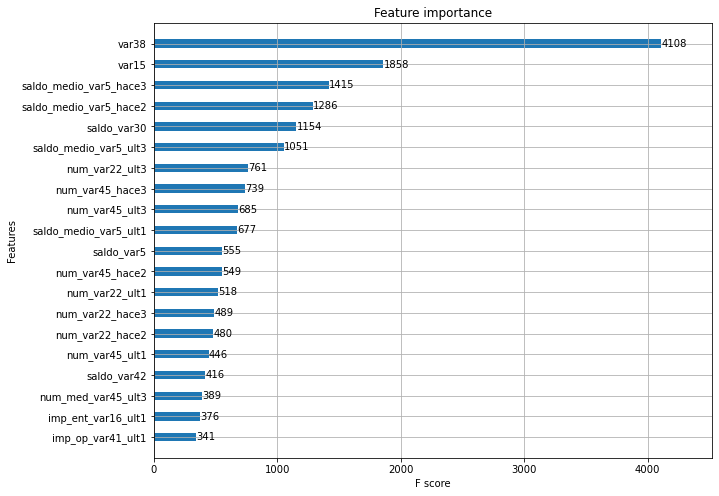

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

# LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [13]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [14]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82965	valid_0's binary_logloss: 0.15092	valid_1's auc: 0.824865	valid_1's binary_logloss: 0.15978
[3]	valid_0's auc: 0.835112	valid_0's binary_logloss: 0.147151	valid_1's auc: 0.826157	valid_1's binary_logloss: 0.156174
[4]	valid_0's auc: 0.839678	valid_0's binary_logloss: 0.14422	valid_1's auc: 0.830489	valid_1's binary_logloss: 0.153395
[5]	valid_0's auc: 0.842477	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.832915	valid_1's binary_logloss: 0.151083
[6]	valid_0's auc: 0.845763	valid_0's binary_logloss: 0.139668	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149317
[7]	valid_0's auc: 0.846352	valid_0's binary_logloss: 0.137997	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.14773
[8]	valid_0's auc: 0.849153	valid_0's binary_logloss: 0.13653	valid_1's auc: 0.837152	valid

[27]	valid_0's auc: 0.873237	valid_0's binary_logloss: 0.124997	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874176	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13975
[29]	valid_0's auc: 0.875669	valid_0's binary_logloss: 0.12433	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139647
[30]	valid_0's auc: 0.876717	valid_0's binary_logloss: 0.12398	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139626
[31]	valid_0's auc: 0.877795	valid_0's binary_logloss: 0.123676	valid_1's auc: 0.838812	valid_1's binary_logloss: 0.139567
[32]	valid_0's auc: 0.878434	valid_0's binary_logloss: 0.12342	valid_1's auc: 0.838766	valid_1's binary_logloss: 0.139551
[33]	valid_0's auc: 0.879133	valid_0's binary_logloss: 0.123178	valid_1's auc: 0.838496	valid_1's binary_logloss: 0.139549
[34]	valid_0's auc: 0.880045	valid_0's binary_logloss: 0.122943	valid_1's auc: 0.838858	valid_1's binary_logloss: 0.13947
[35]	valid_0's auc: 0

[26]	valid_0's auc: 0.873104	valid_0's binary_logloss: 0.124779	valid_1's auc: 0.839199	valid_1's binary_logloss: 0.139332
[27]	valid_0's auc: 0.873923	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.838771	valid_1's binary_logloss: 0.139331
[28]	valid_0's auc: 0.874885	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.838559	valid_1's binary_logloss: 0.139318
[29]	valid_0's auc: 0.876023	valid_0's binary_logloss: 0.123799	valid_1's auc: 0.838707	valid_1's binary_logloss: 0.139253
[30]	valid_0's auc: 0.876849	valid_0's binary_logloss: 0.123528	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139194
[31]	valid_0's auc: 0.877276	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.839117	valid_1's binary_logloss: 0.139112
[32]	valid_0's auc: 0.878261	valid_0's binary_logloss: 0.122955	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139114
[33]	valid_0's auc: 0.878852	valid_0's binary_logloss: 0.12268	valid_1's auc: 0.83874	valid_1's binary_logloss: 0.139099
[34]	valid_0's auc:

[10]	valid_0's auc: 0.85341	valid_0's binary_logloss: 0.133984	valid_1's auc: 0.838489	valid_1's binary_logloss: 0.144779
[11]	valid_0's auc: 0.854546	valid_0's binary_logloss: 0.133037	valid_1's auc: 0.838329	valid_1's binary_logloss: 0.144036
[12]	valid_0's auc: 0.857306	valid_0's binary_logloss: 0.132091	valid_1's auc: 0.838501	valid_1's binary_logloss: 0.143435
[13]	valid_0's auc: 0.858931	valid_0's binary_logloss: 0.131258	valid_1's auc: 0.837569	valid_1's binary_logloss: 0.143004
[14]	valid_0's auc: 0.8606	valid_0's binary_logloss: 0.130532	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.14251
[15]	valid_0's auc: 0.862474	valid_0's binary_logloss: 0.129788	valid_1's auc: 0.838158	valid_1's binary_logloss: 0.142078
[16]	valid_0's auc: 0.864271	valid_0's binary_logloss: 0.129131	valid_1's auc: 0.838075	valid_1's binary_logloss: 0.141796
[17]	valid_0's auc: 0.865398	valid_0's binary_logloss: 0.128509	valid_1's auc: 0.837949	valid_1's binary_logloss: 0.141482
[18]	valid_0's auc: 

[27]	valid_0's auc: 0.874915	valid_0's binary_logloss: 0.124512	valid_1's auc: 0.837071	valid_1's binary_logloss: 0.13997
[28]	valid_0's auc: 0.875606	valid_0's binary_logloss: 0.124208	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.876828	valid_0's binary_logloss: 0.12384	valid_1's auc: 0.83773	valid_1's binary_logloss: 0.139822
[30]	valid_0's auc: 0.877457	valid_0's binary_logloss: 0.123547	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.139791
[31]	valid_0's auc: 0.879129	valid_0's binary_logloss: 0.123153	valid_1's auc: 0.837573	valid_1's binary_logloss: 0.139724
[32]	valid_0's auc: 0.88021	valid_0's binary_logloss: 0.122849	valid_1's auc: 0.837413	valid_1's binary_logloss: 0.13971
[33]	valid_0's auc: 0.880849	valid_0's binary_logloss: 0.1226	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139722
[34]	valid_0's auc: 0.881626	valid_0's binary_logloss: 0.122303	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.139833
[35]	valid_0's auc: 0.8

[54]	valid_0's auc: 0.893288	valid_0's binary_logloss: 0.118266	valid_1's auc: 0.838832	valid_1's binary_logloss: 0.139575
[55]	valid_0's auc: 0.893769	valid_0's binary_logloss: 0.11806	valid_1's auc: 0.838627	valid_1's binary_logloss: 0.139607
[56]	valid_0's auc: 0.894199	valid_0's binary_logloss: 0.11793	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.139637
[57]	valid_0's auc: 0.89466	valid_0's binary_logloss: 0.117712	valid_1's auc: 0.838783	valid_1's binary_logloss: 0.139591
[58]	valid_0's auc: 0.895326	valid_0's binary_logloss: 0.117469	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.13955
[59]	valid_0's auc: 0.895879	valid_0's binary_logloss: 0.117248	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.139528
[60]	valid_0's auc: 0.896271	valid_0's binary_logloss: 0.117049	valid_1's auc: 0.839353	valid_1's binary_logloss: 0.13952
[61]	valid_0's auc: 0.896615	valid_0's binary_logloss: 0.116883	valid_1's auc: 0.839499	valid_1's binary_logloss: 0.139489
[62]	valid_0's auc: 0

[10]	valid_0's auc: 0.853064	valid_0's binary_logloss: 0.134115	valid_1's auc: 0.839823	valid_1's binary_logloss: 0.144302
[11]	valid_0's auc: 0.854919	valid_0's binary_logloss: 0.133155	valid_1's auc: 0.840621	valid_1's binary_logloss: 0.143506
[12]	valid_0's auc: 0.856715	valid_0's binary_logloss: 0.132248	valid_1's auc: 0.840435	valid_1's binary_logloss: 0.142879
[13]	valid_0's auc: 0.858054	valid_0's binary_logloss: 0.131499	valid_1's auc: 0.840894	valid_1's binary_logloss: 0.142242
[14]	valid_0's auc: 0.859881	valid_0's binary_logloss: 0.130754	valid_1's auc: 0.840391	valid_1's binary_logloss: 0.141889
[15]	valid_0's auc: 0.860608	valid_0's binary_logloss: 0.130108	valid_1's auc: 0.839964	valid_1's binary_logloss: 0.141599
[16]	valid_0's auc: 0.86226	valid_0's binary_logloss: 0.129507	valid_1's auc: 0.839505	valid_1's binary_logloss: 0.141272
[17]	valid_0's auc: 0.863173	valid_0's binary_logloss: 0.12899	valid_1's auc: 0.839661	valid_1's binary_logloss: 0.14098
[18]	valid_0's auc:

[36]	valid_0's auc: 0.883981	valid_0's binary_logloss: 0.121751	valid_1's auc: 0.83942	valid_1's binary_logloss: 0.139698
[37]	valid_0's auc: 0.884536	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.839286	valid_1's binary_logloss: 0.139722
[38]	valid_0's auc: 0.885008	valid_0's binary_logloss: 0.121239	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.139702
[39]	valid_0's auc: 0.885772	valid_0's binary_logloss: 0.120942	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139728
[40]	valid_0's auc: 0.886333	valid_0's binary_logloss: 0.120696	valid_1's auc: 0.838994	valid_1's binary_logloss: 0.139732
[41]	valid_0's auc: 0.887173	valid_0's binary_logloss: 0.120427	valid_1's auc: 0.838893	valid_1's binary_logloss: 0.139736
[42]	valid_0's auc: 0.887719	valid_0's binary_logloss: 0.120203	valid_1's auc: 0.838618	valid_1's binary_logloss: 0.139774
[43]	valid_0's auc: 0.888297	valid_0's binary_logloss: 0.119986	valid_1's auc: 0.838552	valid_1's binary_logloss: 0.139746
[44]	valid_0's au

[10]	valid_0's auc: 0.869022	valid_0's binary_logloss: 0.130742	valid_1's auc: 0.837612	valid_1's binary_logloss: 0.144548
[11]	valid_0's auc: 0.870497	valid_0's binary_logloss: 0.129588	valid_1's auc: 0.837759	valid_1's binary_logloss: 0.143849
[12]	valid_0's auc: 0.872518	valid_0's binary_logloss: 0.128457	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.143269
[13]	valid_0's auc: 0.874694	valid_0's binary_logloss: 0.127432	valid_1's auc: 0.836313	valid_1's binary_logloss: 0.142877
[14]	valid_0's auc: 0.876266	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.14241
[15]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.125641	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.142163
[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841096	valid_0's binary_logloss: 0.149709	valid_1's auc: 0.825641	valid_1's binary_logloss: 0.15949
[3]	valid_0's auc: 0.848361	valid_0's binary_logloss: 0.145584	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.155764
[4]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.142253	valid_1's auc: 0.83515	valid_1's binary_logloss: 0.152885
[5]	valid_0's auc: 0.857338	valid_0's binary_logloss: 0.139546	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.15064
[6]	valid_0's auc: 0.859151	valid_0's binary_logloss: 0.137304	valid_1's auc: 0.839307	valid_1's binary_logloss: 0.148859
[7]	valid_0's auc: 0.861253	valid_0's binary_logloss: 0.135409	valid_1's auc: 0.838729	valid_1's binary_logloss: 0.147425
[8]	valid_0's auc: 0.862776	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.839429	val

[29]	valid_0's auc: 0.898521	valid_0's binary_logloss: 0.116522	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.139847
[30]	valid_0's auc: 0.899896	valid_0's binary_logloss: 0.116055	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.13982
[31]	valid_0's auc: 0.900788	valid_0's binary_logloss: 0.11557	valid_1's auc: 0.836875	valid_1's binary_logloss: 0.139885
[32]	valid_0's auc: 0.901489	valid_0's binary_logloss: 0.11514	valid_1's auc: 0.836902	valid_1's binary_logloss: 0.139838
[33]	valid_0's auc: 0.902407	valid_0's binary_logloss: 0.114726	valid_1's auc: 0.836225	valid_1's binary_logloss: 0.139984
[34]	valid_0's auc: 0.90329	valid_0's binary_logloss: 0.114316	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.139876
[35]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.113931	valid_1's auc: 0.836852	valid_1's binary_logloss: 0.139836
[36]	valid_0's auc: 0.905135	valid_0's binary_logloss: 0.113541	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.139779
[37]	valid_0's auc: 

[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc: 0.883967	valid_0's binary_logloss: 0.122718	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.141185
[20]	valid_0's auc: 0.885189	valid_0's binary_logloss: 0.122115	valid_1's auc: 0.835302	valid_1's binary_logloss: 0.141116
[21]	valid_0's auc: 0.886826	valid_0's binary_logloss: 0.121432	valid_1's auc: 0.835725	valid_1's binary_logloss: 0.140891
[22]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120776	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.140802
[23]	valid_0's auc: 0.889885	valid_0's binary_logloss: 0.120198	valid_1's auc: 0.835672	valid_1's binary_logloss: 0.140729
[24]	valid_0's au

[10]	valid_0's auc: 0.867139	valid_0's binary_logloss: 0.131035	valid_1's auc: 0.840976	valid_1's binary_logloss: 0.144453
[11]	valid_0's auc: 0.869228	valid_0's binary_logloss: 0.129818	valid_1's auc: 0.841221	valid_1's binary_logloss: 0.143603
[12]	valid_0's auc: 0.871396	valid_0's binary_logloss: 0.12874	valid_1's auc: 0.84082	valid_1's binary_logloss: 0.142987
[13]	valid_0's auc: 0.872944	valid_0's binary_logloss: 0.127718	valid_1's auc: 0.840903	valid_1's binary_logloss: 0.142482
[14]	valid_0's auc: 0.874408	valid_0's binary_logloss: 0.126796	valid_1's auc: 0.840501	valid_1's binary_logloss: 0.142054
[15]	valid_0's auc: 0.875827	valid_0's binary_logloss: 0.12592	valid_1's auc: 0.84066	valid_1's binary_logloss: 0.141743
[16]	valid_0's auc: 0.87829	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.141352
[17]	valid_0's auc: 0.880138	valid_0's binary_logloss: 0.12442	valid_1's auc: 0.840131	valid_1's binary_logloss: 0.141047
[18]	valid_0's auc: 0.

[37]	valid_0's auc: 0.905663	valid_0's binary_logloss: 0.1132	valid_1's auc: 0.837534	valid_1's binary_logloss: 0.139679
[38]	valid_0's auc: 0.906461	valid_0's binary_logloss: 0.112815	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.139671
[39]	valid_0's auc: 0.907392	valid_0's binary_logloss: 0.112388	valid_1's auc: 0.837172	valid_1's binary_logloss: 0.139719
Early stopping, best iteration is:
[9]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.131926	valid_1's auc: 0.84218	valid_1's binary_logloss: 0.144805
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829743	valid_0's binary_logloss: 0.151018	valid_1's auc: 0.825549	valid_1's binary_logloss: 0.159688
[3]	valid_0's auc: 0.835138	valid_0's binary_logloss: 0.14718	valid_1's auc: 0.827429	valid_1's binary_logloss: 0.156074
[4]	valid_0's auc: 0.839942	valid_0's binary_logloss

[21]	valid_0's auc: 0.867603	valid_0's binary_logloss: 0.127332	valid_1's auc: 0.838745	valid_1's binary_logloss: 0.140388
[22]	valid_0's auc: 0.868543	valid_0's binary_logloss: 0.126965	valid_1's auc: 0.839411	valid_1's binary_logloss: 0.140109
[23]	valid_0's auc: 0.869425	valid_0's binary_logloss: 0.126584	valid_1's auc: 0.839209	valid_1's binary_logloss: 0.140008
[24]	valid_0's auc: 0.870709	valid_0's binary_logloss: 0.126196	valid_1's auc: 0.839023	valid_1's binary_logloss: 0.139927
[25]	valid_0's auc: 0.871705	valid_0's binary_logloss: 0.125859	valid_1's auc: 0.839425	valid_1's binary_logloss: 0.139761
[26]	valid_0's auc: 0.872446	valid_0's binary_logloss: 0.125544	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873429	valid_0's binary_logloss: 0.12522	valid_1's auc: 0.839302	valid_1's binary_logloss: 0.139616
[28]	valid_0's auc: 0.874223	valid_0's binary_logloss: 0.124891	valid_1's auc: 0.839407	valid_1's binary_logloss: 0.139551
[29]	valid_0's au

[10]	valid_0's auc: 0.855068	valid_0's binary_logloss: 0.134344	valid_1's auc: 0.837945	valid_1's binary_logloss: 0.14436
[11]	valid_0's auc: 0.85623	valid_0's binary_logloss: 0.133408	valid_1's auc: 0.838505	valid_1's binary_logloss: 0.143531
[12]	valid_0's auc: 0.858039	valid_0's binary_logloss: 0.132542	valid_1's auc: 0.837412	valid_1's binary_logloss: 0.14298
[13]	valid_0's auc: 0.859028	valid_0's binary_logloss: 0.131715	valid_1's auc: 0.837556	valid_1's binary_logloss: 0.142378
[14]	valid_0's auc: 0.859761	valid_0's binary_logloss: 0.131029	valid_1's auc: 0.837747	valid_1's binary_logloss: 0.141936
[15]	valid_0's auc: 0.860544	valid_0's binary_logloss: 0.130418	valid_1's auc: 0.837904	valid_1's binary_logloss: 0.141546
[16]	valid_0's auc: 0.861421	valid_0's binary_logloss: 0.129852	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.141202
[17]	valid_0's auc: 0.862273	valid_0's binary_logloss: 0.129325	valid_1's auc: 0.838706	valid_1's binary_logloss: 0.140882
[18]	valid_0's auc:

[23]	valid_0's auc: 0.868299	valid_0's binary_logloss: 0.126879	valid_1's auc: 0.840645	valid_1's binary_logloss: 0.139859
[24]	valid_0's auc: 0.868969	valid_0's binary_logloss: 0.126539	valid_1's auc: 0.840613	valid_1's binary_logloss: 0.139718
[25]	valid_0's auc: 0.869633	valid_0's binary_logloss: 0.126207	valid_1's auc: 0.840891	valid_1's binary_logloss: 0.139605
[26]	valid_0's auc: 0.870328	valid_0's binary_logloss: 0.125875	valid_1's auc: 0.840762	valid_1's binary_logloss: 0.139544
[27]	valid_0's auc: 0.871064	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.139537
[28]	valid_0's auc: 0.871903	valid_0's binary_logloss: 0.125269	valid_1's auc: 0.840808	valid_1's binary_logloss: 0.139402
[29]	valid_0's auc: 0.872504	valid_0's binary_logloss: 0.125	valid_1's auc: 0.841418	valid_1's binary_logloss: 0.139244
[30]	valid_0's auc: 0.873414	valid_0's binary_logloss: 0.124748	valid_1's auc: 0.841413	valid_1's binary_logloss: 0.139195
[31]	valid_0's auc:

[22]	valid_0's auc: 0.870345	valid_0's binary_logloss: 0.12668	valid_1's auc: 0.839281	valid_1's binary_logloss: 0.140273
[23]	valid_0's auc: 0.871035	valid_0's binary_logloss: 0.126324	valid_1's auc: 0.839652	valid_1's binary_logloss: 0.140125
[24]	valid_0's auc: 0.871946	valid_0's binary_logloss: 0.125946	valid_1's auc: 0.839275	valid_1's binary_logloss: 0.140088
[25]	valid_0's auc: 0.872852	valid_0's binary_logloss: 0.125614	valid_1's auc: 0.839435	valid_1's binary_logloss: 0.140002
[26]	valid_0's auc: 0.87384	valid_0's binary_logloss: 0.125262	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139982
[27]	valid_0's auc: 0.874627	valid_0's binary_logloss: 0.124925	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.139915
[28]	valid_0's auc: 0.875699	valid_0's binary_logloss: 0.124584	valid_1's auc: 0.839547	valid_1's binary_logloss: 0.139817
[29]	valid_0's auc: 0.876221	valid_0's binary_logloss: 0.124306	valid_1's auc: 0.839141	valid_1's binary_logloss: 0.139849
[30]	valid_0's auc

[12]	valid_0's auc: 0.856699	valid_0's binary_logloss: 0.132606	valid_1's auc: 0.839776	valid_1's binary_logloss: 0.143123
[13]	valid_0's auc: 0.858133	valid_0's binary_logloss: 0.131826	valid_1's auc: 0.839092	valid_1's binary_logloss: 0.14264
[14]	valid_0's auc: 0.858859	valid_0's binary_logloss: 0.131173	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.142235
[15]	valid_0's auc: 0.860192	valid_0's binary_logloss: 0.130494	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.141945
[16]	valid_0's auc: 0.861126	valid_0's binary_logloss: 0.129897	valid_1's auc: 0.838178	valid_1's binary_logloss: 0.141638
[17]	valid_0's auc: 0.862291	valid_0's binary_logloss: 0.129367	valid_1's auc: 0.837501	valid_1's binary_logloss: 0.14141
[18]	valid_0's auc: 0.863527	valid_0's binary_logloss: 0.128804	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141112
[19]	valid_0's auc: 0.864889	valid_0's binary_logloss: 0.128277	valid_1's auc: 0.838259	valid_1's binary_logloss: 0.140809
[20]	valid_0's auc

[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833952	valid_0's binary_logloss: 0.151068	valid_1's auc: 0.82089	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.837129	valid_0's binary_logloss: 0.147251	valid_1's auc: 0.824177	valid_1's binary_logloss: 0.156394
[4]	valid_0's auc: 0.843357	valid_0's binary_logloss: 0.144256	valid_1's auc: 0.83301	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.845853	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.834409	valid_1's binary_logloss: 0.15109
[6]	valid_0's auc: 0.848055	valid_0's binary_logloss: 0.139884	valid_1's auc: 0.83599	valid_1's binary_logloss: 0.149188
[7]	valid_0's auc: 0.849216	valid_0's binary_logloss: 0.138169	valid_1's auc: 0.837457	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.851252	valid_0's binary_logloss: 0.136718	valid_1's auc: 0.838737	val

[13]	valid_0's auc: 0.857556	valid_0's binary_logloss: 0.13198	valid_1's auc: 0.838985	valid_1's binary_logloss: 0.142674
[14]	valid_0's auc: 0.858946	valid_0's binary_logloss: 0.131277	valid_1's auc: 0.839592	valid_1's binary_logloss: 0.142176
[15]	valid_0's auc: 0.859463	valid_0's binary_logloss: 0.130681	valid_1's auc: 0.839554	valid_1's binary_logloss: 0.141766
[16]	valid_0's auc: 0.861133	valid_0's binary_logloss: 0.130082	valid_1's auc: 0.839698	valid_1's binary_logloss: 0.141417
[17]	valid_0's auc: 0.862389	valid_0's binary_logloss: 0.129514	valid_1's auc: 0.840248	valid_1's binary_logloss: 0.141118
[18]	valid_0's auc: 0.863322	valid_0's binary_logloss: 0.128971	valid_1's auc: 0.840677	valid_1's binary_logloss: 0.140784
[19]	valid_0's auc: 0.864222	valid_0's binary_logloss: 0.128503	valid_1's auc: 0.84088	valid_1's binary_logloss: 0.140519
[20]	valid_0's auc: 0.865397	valid_0's binary_logloss: 0.12806	valid_1's auc: 0.840878	valid_1's binary_logloss: 0.140299
[21]	valid_0's auc:

[14]	valid_0's auc: 0.861141	valid_0's binary_logloss: 0.130863	valid_1's auc: 0.839692	valid_1's binary_logloss: 0.142351
[15]	valid_0's auc: 0.862729	valid_0's binary_logloss: 0.130183	valid_1's auc: 0.839553	valid_1's binary_logloss: 0.141979
[16]	valid_0's auc: 0.863881	valid_0's binary_logloss: 0.129599	valid_1's auc: 0.839301	valid_1's binary_logloss: 0.141721
[17]	valid_0's auc: 0.865172	valid_0's binary_logloss: 0.129048	valid_1's auc: 0.839254	valid_1's binary_logloss: 0.141394
[18]	valid_0's auc: 0.866347	valid_0's binary_logloss: 0.128499	valid_1's auc: 0.838727	valid_1's binary_logloss: 0.141154
[19]	valid_0's auc: 0.867494	valid_0's binary_logloss: 0.127978	valid_1's auc: 0.838823	valid_1's binary_logloss: 0.14085
[20]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.127501	valid_1's auc: 0.839034	valid_1's binary_logloss: 0.140713
[21]	valid_0's auc: 0.869399	valid_0's binary_logloss: 0.127084	valid_1's auc: 0.839077	valid_1's binary_logloss: 0.140501
[22]	valid_0's au

[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848463	valid_0's binary_logloss: 0.146017	valid_1's auc: 0.829633	valid_1's binary_logloss: 0.156156
[4]	valid_0's auc: 0.852213	valid_0's binary_logloss: 0.142854	valid_1's auc: 0.831653	valid_1's binary_logloss: 0.153329
[5]	valid_0's auc: 0.856788	valid_0's binary_logloss: 0.140177	valid_1's auc: 0.834433	valid_1's binary_logloss: 0.151091
[6]	valid_0's auc: 0.860632	valid_0's binary_logloss: 0.137921	valid_1's auc: 0.836157	valid_1's binary_logloss: 0.149285
[7]	valid_0's auc: 0.862933	valid_0's binary_logloss: 0.136017	valid_1's auc: 0.836577	valid_1's binary_logloss: 0.147796
[8]	valid_0's auc: 0.864314	valid_0's binary_logloss: 0.134386	valid_1's auc: 0.836999

[28]	valid_0's auc: 0.892934	valid_0's binary_logloss: 0.119048	valid_1's auc: 0.838032	valid_1's binary_logloss: 0.139456
[29]	valid_0's auc: 0.893916	valid_0's binary_logloss: 0.11863	valid_1's auc: 0.838337	valid_1's binary_logloss: 0.139417
[30]	valid_0's auc: 0.89493	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.838325	valid_1's binary_logloss: 0.139369
[31]	valid_0's auc: 0.895676	valid_0's binary_logloss: 0.11783	valid_1's auc: 0.838392	valid_1's binary_logloss: 0.139363
[32]	valid_0's auc: 0.896629	valid_0's binary_logloss: 0.11742	valid_1's auc: 0.838672	valid_1's binary_logloss: 0.139258
[33]	valid_0's auc: 0.897375	valid_0's binary_logloss: 0.117081	valid_1's auc: 0.838017	valid_1's binary_logloss: 0.139339
[34]	valid_0's auc: 0.898536	valid_0's binary_logloss: 0.11671	valid_1's auc: 0.838448	valid_1's binary_logloss: 0.139301
[35]	valid_0's auc: 0.899294	valid_0's binary_logloss: 0.116358	valid_1's auc: 0.83801	valid_1's binary_logloss: 0.139398
[36]	valid_0's auc: 0.

[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845771	valid_0's binary_logloss: 0.150186	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.159526
[3]	valid_0's auc: 0.848443	valid_0's binary_logloss: 0.145978	valid_1's auc: 0.833062	valid_1's binary_logloss: 0.15588
[4]	valid_0's auc: 0.851538	valid_0's binary_logloss: 0.142729	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.153021
[5]	valid_0's auc: 0.853675	valid_0's binary_logloss: 0.140151	valid_1's auc: 0.833937	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.858806	valid_0's binary_logloss: 0.137922	valid_1's auc: 0.836624	valid_1's binary_logloss: 0.148776
[7]	valid_0's auc: 0.861104	valid_0's binary_logloss: 0.136051	valid_1's auc: 0.838108	valid_1's binary_logloss: 0.147208
[8]	valid_0's auc: 0.86355	valid_0's binary_logloss: 0.134417	valid_1's auc: 0.838247	

[16]	valid_0's auc: 0.878541	valid_0's binary_logloss: 0.125992	valid_1's auc: 0.835636	valid_1's binary_logloss: 0.141705
[17]	valid_0's auc: 0.879773	valid_0's binary_logloss: 0.125312	valid_1's auc: 0.836068	valid_1's binary_logloss: 0.141422
[18]	valid_0's auc: 0.881206	valid_0's binary_logloss: 0.124607	valid_1's auc: 0.835907	valid_1's binary_logloss: 0.141232
[19]	valid_0's auc: 0.882227	valid_0's binary_logloss: 0.123945	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.140955
[20]	valid_0's auc: 0.883084	valid_0's binary_logloss: 0.123391	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.140874
[21]	valid_0's auc: 0.884492	valid_0's binary_logloss: 0.122771	valid_1's auc: 0.835176	valid_1's binary_logloss: 0.140717
[22]	valid_0's auc: 0.885916	valid_0's binary_logloss: 0.122201	valid_1's auc: 0.834761	valid_1's binary_logloss: 0.140682
[23]	valid_0's auc: 0.88738	valid_0's binary_logloss: 0.121681	valid_1's auc: 0.834223	valid_1's binary_logloss: 0.140675
[24]	valid_0's au

[8]	valid_0's auc: 0.864201	valid_0's binary_logloss: 0.134257	valid_1's auc: 0.838502	valid_1's binary_logloss: 0.145767
[9]	valid_0's auc: 0.866436	valid_0's binary_logloss: 0.132788	valid_1's auc: 0.838455	valid_1's binary_logloss: 0.144766
[10]	valid_0's auc: 0.868269	valid_0's binary_logloss: 0.131522	valid_1's auc: 0.83801	valid_1's binary_logloss: 0.143864
[11]	valid_0's auc: 0.869549	valid_0's binary_logloss: 0.130378	valid_1's auc: 0.837793	valid_1's binary_logloss: 0.143109
[12]	valid_0's auc: 0.870987	valid_0's binary_logloss: 0.129314	valid_1's auc: 0.838067	valid_1's binary_logloss: 0.142427
[13]	valid_0's auc: 0.872719	valid_0's binary_logloss: 0.128378	valid_1's auc: 0.838631	valid_1's binary_logloss: 0.141849
[14]	valid_0's auc: 0.874361	valid_0's binary_logloss: 0.127437	valid_1's auc: 0.839073	valid_1's binary_logloss: 0.141404
[15]	valid_0's auc: 0.876098	valid_0's binary_logloss: 0.126598	valid_1's auc: 0.838285	valid_1's binary_logloss: 0.141151
[16]	valid_0's auc:

[31]	valid_0's auc: 0.893948	valid_0's binary_logloss: 0.118371	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.139379
[32]	valid_0's auc: 0.894817	valid_0's binary_logloss: 0.118017	valid_1's auc: 0.839601	valid_1's binary_logloss: 0.139254
[33]	valid_0's auc: 0.895646	valid_0's binary_logloss: 0.117657	valid_1's auc: 0.839317	valid_1's binary_logloss: 0.139315
[34]	valid_0's auc: 0.896649	valid_0's binary_logloss: 0.117197	valid_1's auc: 0.839013	valid_1's binary_logloss: 0.139333
[35]	valid_0's auc: 0.897709	valid_0's binary_logloss: 0.11682	valid_1's auc: 0.839041	valid_1's binary_logloss: 0.139313
[36]	valid_0's auc: 0.898729	valid_0's binary_logloss: 0.116431	valid_1's auc: 0.839194	valid_1's binary_logloss: 0.139271
[37]	valid_0's auc: 0.89982	valid_0's binary_logloss: 0.116002	valid_1's auc: 0.839477	valid_1's binary_logloss: 0.139228
[38]	valid_0's auc: 0.900611	valid_0's binary_logloss: 0.115643	valid_1's auc: 0.839275	valid_1's binary_logloss: 0.139279
[39]	valid_0's auc

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82965	valid_0's binary_logloss: 0.15092	valid_1's auc: 0.824865	valid_1's binary_logloss: 0.15978
[3]	valid_0's auc: 0.835112	valid_0's binary_logloss: 0.147151	valid_1's auc: 0.826157	valid_1's binary_logloss: 0.156174
[4]	valid_0's auc: 0.839678	valid_0's binary_logloss: 0.14422	valid_1's auc: 0.830489	valid_1's binary_logloss: 0.153395
[5]	valid_0's auc: 0.842477	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.832915	valid_1's binary_logloss: 0.151083
[6]	valid_0's auc: 0.845763	valid_0's binary_logloss: 0.139668	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149317
[7]	valid_0's auc: 0.846352	valid_0's binary_logloss: 0.137997	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.14773
[8]	valid_0's auc: 0.849153	valid_0's binary_logloss: 0.13653	valid_1's auc: 0.837152	valid

[27]	valid_0's auc: 0.873237	valid_0's binary_logloss: 0.124997	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874176	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13975
[29]	valid_0's auc: 0.875669	valid_0's binary_logloss: 0.12433	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139647
[30]	valid_0's auc: 0.876717	valid_0's binary_logloss: 0.12398	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139626
[31]	valid_0's auc: 0.877795	valid_0's binary_logloss: 0.123676	valid_1's auc: 0.838812	valid_1's binary_logloss: 0.139567
[32]	valid_0's auc: 0.878434	valid_0's binary_logloss: 0.12342	valid_1's auc: 0.838766	valid_1's binary_logloss: 0.139551
[33]	valid_0's auc: 0.879133	valid_0's binary_logloss: 0.123178	valid_1's auc: 0.838496	valid_1's binary_logloss: 0.139549
[34]	valid_0's auc: 0.880045	valid_0's binary_logloss: 0.122943	valid_1's auc: 0.838858	valid_1's binary_logloss: 0.13947
[35]	valid_0's auc: 0

[28]	valid_0's auc: 0.874885	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.838559	valid_1's binary_logloss: 0.139318
[29]	valid_0's auc: 0.876023	valid_0's binary_logloss: 0.123799	valid_1's auc: 0.838707	valid_1's binary_logloss: 0.139253
[30]	valid_0's auc: 0.876849	valid_0's binary_logloss: 0.123528	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139194
[31]	valid_0's auc: 0.877276	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.839117	valid_1's binary_logloss: 0.139112
[32]	valid_0's auc: 0.878261	valid_0's binary_logloss: 0.122955	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139114
[33]	valid_0's auc: 0.878852	valid_0's binary_logloss: 0.12268	valid_1's auc: 0.83874	valid_1's binary_logloss: 0.139099
[34]	valid_0's auc: 0.880003	valid_0's binary_logloss: 0.122395	valid_1's auc: 0.838575	valid_1's binary_logloss: 0.139116
[35]	valid_0's auc: 0.880983	valid_0's binary_logloss: 0.12215	valid_1's auc: 0.838595	valid_1's binary_logloss: 0.139087
[36]	valid_0's auc:

[11]	valid_0's auc: 0.854546	valid_0's binary_logloss: 0.133037	valid_1's auc: 0.838329	valid_1's binary_logloss: 0.144036
[12]	valid_0's auc: 0.857306	valid_0's binary_logloss: 0.132091	valid_1's auc: 0.838501	valid_1's binary_logloss: 0.143435
[13]	valid_0's auc: 0.858931	valid_0's binary_logloss: 0.131258	valid_1's auc: 0.837569	valid_1's binary_logloss: 0.143004
[14]	valid_0's auc: 0.8606	valid_0's binary_logloss: 0.130532	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.14251
[15]	valid_0's auc: 0.862474	valid_0's binary_logloss: 0.129788	valid_1's auc: 0.838158	valid_1's binary_logloss: 0.142078
[16]	valid_0's auc: 0.864271	valid_0's binary_logloss: 0.129131	valid_1's auc: 0.838075	valid_1's binary_logloss: 0.141796
[17]	valid_0's auc: 0.865398	valid_0's binary_logloss: 0.128509	valid_1's auc: 0.837949	valid_1's binary_logloss: 0.141482
[18]	valid_0's auc: 0.866784	valid_0's binary_logloss: 0.127959	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.141186
[19]	valid_0's auc:

[29]	valid_0's auc: 0.876828	valid_0's binary_logloss: 0.12384	valid_1's auc: 0.83773	valid_1's binary_logloss: 0.139822
[30]	valid_0's auc: 0.877457	valid_0's binary_logloss: 0.123547	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.139791
[31]	valid_0's auc: 0.879129	valid_0's binary_logloss: 0.123153	valid_1's auc: 0.837573	valid_1's binary_logloss: 0.139724
[32]	valid_0's auc: 0.88021	valid_0's binary_logloss: 0.122849	valid_1's auc: 0.837413	valid_1's binary_logloss: 0.13971
[33]	valid_0's auc: 0.880849	valid_0's binary_logloss: 0.1226	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139722
[34]	valid_0's auc: 0.881626	valid_0's binary_logloss: 0.122303	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.139833
[35]	valid_0's auc: 0.88223	valid_0's binary_logloss: 0.122074	valid_1's auc: 0.836267	valid_1's binary_logloss: 0.139875
[36]	valid_0's auc: 0.883053	valid_0's binary_logloss: 0.121807	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.139815
[37]	valid_0's auc: 0.8

[56]	valid_0's auc: 0.894199	valid_0's binary_logloss: 0.11793	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.139637
[57]	valid_0's auc: 0.89466	valid_0's binary_logloss: 0.117712	valid_1's auc: 0.838783	valid_1's binary_logloss: 0.139591
[58]	valid_0's auc: 0.895326	valid_0's binary_logloss: 0.117469	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.13955
[59]	valid_0's auc: 0.895879	valid_0's binary_logloss: 0.117248	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.139528
[60]	valid_0's auc: 0.896271	valid_0's binary_logloss: 0.117049	valid_1's auc: 0.839353	valid_1's binary_logloss: 0.13952
[61]	valid_0's auc: 0.896615	valid_0's binary_logloss: 0.116883	valid_1's auc: 0.839499	valid_1's binary_logloss: 0.139489
[62]	valid_0's auc: 0.896835	valid_0's binary_logloss: 0.116752	valid_1's auc: 0.83954	valid_1's binary_logloss: 0.139477
[63]	valid_0's auc: 0.897122	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.839488	valid_1's binary_logloss: 0.139542
[64]	valid_0's auc: 0

[19]	valid_0's auc: 0.865283	valid_0's binary_logloss: 0.127961	valid_1's auc: 0.840849	valid_1's binary_logloss: 0.140423
[20]	valid_0's auc: 0.866225	valid_0's binary_logloss: 0.127509	valid_1's auc: 0.840833	valid_1's binary_logloss: 0.14018
[21]	valid_0's auc: 0.867694	valid_0's binary_logloss: 0.127023	valid_1's auc: 0.840208	valid_1's binary_logloss: 0.140086
[22]	valid_0's auc: 0.868631	valid_0's binary_logloss: 0.126644	valid_1's auc: 0.840015	valid_1's binary_logloss: 0.140012
[23]	valid_0's auc: 0.869457	valid_0's binary_logloss: 0.126294	valid_1's auc: 0.839557	valid_1's binary_logloss: 0.139913
[24]	valid_0's auc: 0.870406	valid_0's binary_logloss: 0.125894	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139821
[25]	valid_0's auc: 0.871712	valid_0's binary_logloss: 0.125533	valid_1's auc: 0.839452	valid_1's binary_logloss: 0.139734
[26]	valid_0's auc: 0.872351	valid_0's binary_logloss: 0.125211	valid_1's auc: 0.839183	valid_1's binary_logloss: 0.139713
[27]	valid_0's au

[48]	valid_0's auc: 0.890895	valid_0's binary_logloss: 0.118954	valid_1's auc: 0.837653	valid_1's binary_logloss: 0.139901
[49]	valid_0's auc: 0.891347	valid_0's binary_logloss: 0.118761	valid_1's auc: 0.837491	valid_1's binary_logloss: 0.139944
[50]	valid_0's auc: 0.891951	valid_0's binary_logloss: 0.118533	valid_1's auc: 0.837711	valid_1's binary_logloss: 0.139907
[51]	valid_0's auc: 0.892473	valid_0's binary_logloss: 0.118332	valid_1's auc: 0.838058	valid_1's binary_logloss: 0.139842
[52]	valid_0's auc: 0.892939	valid_0's binary_logloss: 0.118139	valid_1's auc: 0.837957	valid_1's binary_logloss: 0.13987
[53]	valid_0's auc: 0.893556	valid_0's binary_logloss: 0.117956	valid_1's auc: 0.837811	valid_1's binary_logloss: 0.139895
Early stopping, best iteration is:
[23]	valid_0's auc: 0.87211	valid_0's binary_logloss: 0.125699	valid_1's auc: 0.840116	valid_1's binary_logloss: 0.14028
[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_log

[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc: 0.883967	valid_0's binary_logloss: 0.122718	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.141185
[20]	valid_0's auc: 0.885189	valid_0's binary_logloss: 0.122115	valid_1's auc: 0.835302	valid_1's binary_logloss: 0.141116
[21]	valid_0's auc: 0.886826	valid_0's binary_logloss: 0.121432	valid_1's auc: 0.835725	valid_1's binary_logloss: 0.140891
[22]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120776	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.140802
[23]	valid_0's auc: 0.889885	valid_0's binary_logloss: 0.120198	valid_1's auc: 0.835672	valid_1's binary_logloss: 0.140729
[24]	valid_0's auc: 0.890875	valid_0's binary_logloss: 0.119668	valid_1's auc: 0.835224	valid_1's binary_logloss: 0.14069
[25]	valid_0's au

[8]	valid_0's auc: 0.862776	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.839429	valid_1's binary_logloss: 0.146252
[9]	valid_0's auc: 0.864413	valid_0's binary_logloss: 0.132378	valid_1's auc: 0.839869	valid_1's binary_logloss: 0.145344
[10]	valid_0's auc: 0.867139	valid_0's binary_logloss: 0.131035	valid_1's auc: 0.840976	valid_1's binary_logloss: 0.144453
[11]	valid_0's auc: 0.869228	valid_0's binary_logloss: 0.129818	valid_1's auc: 0.841221	valid_1's binary_logloss: 0.143603
[12]	valid_0's auc: 0.871396	valid_0's binary_logloss: 0.12874	valid_1's auc: 0.84082	valid_1's binary_logloss: 0.142987
[13]	valid_0's auc: 0.872944	valid_0's binary_logloss: 0.127718	valid_1's auc: 0.840903	valid_1's binary_logloss: 0.142482
[14]	valid_0's auc: 0.874408	valid_0's binary_logloss: 0.126796	valid_1's auc: 0.840501	valid_1's binary_logloss: 0.142054
[15]	valid_0's auc: 0.875827	valid_0's binary_logloss: 0.12592	valid_1's auc: 0.84066	valid_1's binary_logloss: 0.141743
[16]	valid_0's auc: 0.

[34]	valid_0's auc: 0.90329	valid_0's binary_logloss: 0.114316	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.139876
[35]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.113931	valid_1's auc: 0.836852	valid_1's binary_logloss: 0.139836
[36]	valid_0's auc: 0.905135	valid_0's binary_logloss: 0.113541	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.139779
[37]	valid_0's auc: 0.905663	valid_0's binary_logloss: 0.1132	valid_1's auc: 0.837534	valid_1's binary_logloss: 0.139679
[38]	valid_0's auc: 0.906461	valid_0's binary_logloss: 0.112815	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.139671
[39]	valid_0's auc: 0.907392	valid_0's binary_logloss: 0.112388	valid_1's auc: 0.837172	valid_1's binary_logloss: 0.139719
Early stopping, best iteration is:
[9]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.131926	valid_1's auc: 0.84218	valid_1's binary_logloss: 0.144805
[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_loglo

[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc: 0.883967	valid_0's binary_logloss: 0.122718	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.141185
[20]	valid_0's auc: 0.885189	valid_0's binary_logloss: 0.122115	valid_1's auc: 0.835302	valid_1's binary_logloss: 0.141116
[21]	valid_0's auc: 0.886826	valid_0's binary_logloss: 0.121432	valid_1's auc: 0.835725	valid_1's binary_logloss: 0.140891
[22]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120776	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.140802
[23]	valid_0's auc: 0.889885	valid_0's binary_logloss: 0.120198	valid_1's auc: 0.835672	valid_1's binary_logloss: 0.140729
[24]	valid_0's au

[9]	valid_0's auc: 0.864413	valid_0's binary_logloss: 0.132378	valid_1's auc: 0.839869	valid_1's binary_logloss: 0.145344
[10]	valid_0's auc: 0.867139	valid_0's binary_logloss: 0.131035	valid_1's auc: 0.840976	valid_1's binary_logloss: 0.144453
[11]	valid_0's auc: 0.869228	valid_0's binary_logloss: 0.129818	valid_1's auc: 0.841221	valid_1's binary_logloss: 0.143603
[12]	valid_0's auc: 0.871396	valid_0's binary_logloss: 0.12874	valid_1's auc: 0.84082	valid_1's binary_logloss: 0.142987
[13]	valid_0's auc: 0.872944	valid_0's binary_logloss: 0.127718	valid_1's auc: 0.840903	valid_1's binary_logloss: 0.142482
[14]	valid_0's auc: 0.874408	valid_0's binary_logloss: 0.126796	valid_1's auc: 0.840501	valid_1's binary_logloss: 0.142054
[15]	valid_0's auc: 0.875827	valid_0's binary_logloss: 0.12592	valid_1's auc: 0.84066	valid_1's binary_logloss: 0.141743
[16]	valid_0's auc: 0.87829	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.141352
[17]	valid_0's auc: 0.

[35]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.113931	valid_1's auc: 0.836852	valid_1's binary_logloss: 0.139836
[36]	valid_0's auc: 0.905135	valid_0's binary_logloss: 0.113541	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.139779
[37]	valid_0's auc: 0.905663	valid_0's binary_logloss: 0.1132	valid_1's auc: 0.837534	valid_1's binary_logloss: 0.139679
[38]	valid_0's auc: 0.906461	valid_0's binary_logloss: 0.112815	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.139671
[39]	valid_0's auc: 0.907392	valid_0's binary_logloss: 0.112388	valid_1's auc: 0.837172	valid_1's binary_logloss: 0.139719
Early stopping, best iteration is:
[9]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.131926	valid_1's auc: 0.84218	valid_1's binary_logloss: 0.144805
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829743	valid_0's binary_logl

[21]	valid_0's auc: 0.867603	valid_0's binary_logloss: 0.127332	valid_1's auc: 0.838745	valid_1's binary_logloss: 0.140388
[22]	valid_0's auc: 0.868543	valid_0's binary_logloss: 0.126965	valid_1's auc: 0.839411	valid_1's binary_logloss: 0.140109
[23]	valid_0's auc: 0.869425	valid_0's binary_logloss: 0.126584	valid_1's auc: 0.839209	valid_1's binary_logloss: 0.140008
[24]	valid_0's auc: 0.870709	valid_0's binary_logloss: 0.126196	valid_1's auc: 0.839023	valid_1's binary_logloss: 0.139927
[25]	valid_0's auc: 0.871705	valid_0's binary_logloss: 0.125859	valid_1's auc: 0.839425	valid_1's binary_logloss: 0.139761
[26]	valid_0's auc: 0.872446	valid_0's binary_logloss: 0.125544	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873429	valid_0's binary_logloss: 0.12522	valid_1's auc: 0.839302	valid_1's binary_logloss: 0.139616
[28]	valid_0's auc: 0.874223	valid_0's binary_logloss: 0.124891	valid_1's auc: 0.839407	valid_1's binary_logloss: 0.139551
[29]	valid_0's au

[12]	valid_0's auc: 0.858039	valid_0's binary_logloss: 0.132542	valid_1's auc: 0.837412	valid_1's binary_logloss: 0.14298
[13]	valid_0's auc: 0.859028	valid_0's binary_logloss: 0.131715	valid_1's auc: 0.837556	valid_1's binary_logloss: 0.142378
[14]	valid_0's auc: 0.859761	valid_0's binary_logloss: 0.131029	valid_1's auc: 0.837747	valid_1's binary_logloss: 0.141936
[15]	valid_0's auc: 0.860544	valid_0's binary_logloss: 0.130418	valid_1's auc: 0.837904	valid_1's binary_logloss: 0.141546
[16]	valid_0's auc: 0.861421	valid_0's binary_logloss: 0.129852	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.141202
[17]	valid_0's auc: 0.862273	valid_0's binary_logloss: 0.129325	valid_1's auc: 0.838706	valid_1's binary_logloss: 0.140882
[18]	valid_0's auc: 0.863607	valid_0's binary_logloss: 0.128759	valid_1's auc: 0.838507	valid_1's binary_logloss: 0.140655
[19]	valid_0's auc: 0.864849	valid_0's binary_logloss: 0.128262	valid_1's auc: 0.838525	valid_1's binary_logloss: 0.140388
[20]	valid_0's au

[21]	valid_0's auc: 0.866278	valid_0's binary_logloss: 0.127647	valid_1's auc: 0.84104	valid_1's binary_logloss: 0.14011
[22]	valid_0's auc: 0.867123	valid_0's binary_logloss: 0.12726	valid_1's auc: 0.840847	valid_1's binary_logloss: 0.139967
[23]	valid_0's auc: 0.868299	valid_0's binary_logloss: 0.126879	valid_1's auc: 0.840645	valid_1's binary_logloss: 0.139859
[24]	valid_0's auc: 0.868969	valid_0's binary_logloss: 0.126539	valid_1's auc: 0.840613	valid_1's binary_logloss: 0.139718
[25]	valid_0's auc: 0.869633	valid_0's binary_logloss: 0.126207	valid_1's auc: 0.840891	valid_1's binary_logloss: 0.139605
[26]	valid_0's auc: 0.870328	valid_0's binary_logloss: 0.125875	valid_1's auc: 0.840762	valid_1's binary_logloss: 0.139544
[27]	valid_0's auc: 0.871064	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.139537
[28]	valid_0's auc: 0.871903	valid_0's binary_logloss: 0.125269	valid_1's auc: 0.840808	valid_1's binary_logloss: 0.139402
[29]	valid_0's auc:

[21]	valid_0's auc: 0.869399	valid_0's binary_logloss: 0.127084	valid_1's auc: 0.839077	valid_1's binary_logloss: 0.140501
[22]	valid_0's auc: 0.870345	valid_0's binary_logloss: 0.12668	valid_1's auc: 0.839281	valid_1's binary_logloss: 0.140273
[23]	valid_0's auc: 0.871035	valid_0's binary_logloss: 0.126324	valid_1's auc: 0.839652	valid_1's binary_logloss: 0.140125
[24]	valid_0's auc: 0.871946	valid_0's binary_logloss: 0.125946	valid_1's auc: 0.839275	valid_1's binary_logloss: 0.140088
[25]	valid_0's auc: 0.872852	valid_0's binary_logloss: 0.125614	valid_1's auc: 0.839435	valid_1's binary_logloss: 0.140002
[26]	valid_0's auc: 0.87384	valid_0's binary_logloss: 0.125262	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139982
[27]	valid_0's auc: 0.874627	valid_0's binary_logloss: 0.124925	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.139915
[28]	valid_0's auc: 0.875699	valid_0's binary_logloss: 0.124584	valid_1's auc: 0.839547	valid_1's binary_logloss: 0.139817
[29]	valid_0's auc

[12]	valid_0's auc: 0.856699	valid_0's binary_logloss: 0.132606	valid_1's auc: 0.839776	valid_1's binary_logloss: 0.143123
[13]	valid_0's auc: 0.858133	valid_0's binary_logloss: 0.131826	valid_1's auc: 0.839092	valid_1's binary_logloss: 0.14264
[14]	valid_0's auc: 0.858859	valid_0's binary_logloss: 0.131173	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.142235
[15]	valid_0's auc: 0.860192	valid_0's binary_logloss: 0.130494	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.141945
[16]	valid_0's auc: 0.861126	valid_0's binary_logloss: 0.129897	valid_1's auc: 0.838178	valid_1's binary_logloss: 0.141638
[17]	valid_0's auc: 0.862291	valid_0's binary_logloss: 0.129367	valid_1's auc: 0.837501	valid_1's binary_logloss: 0.14141
[18]	valid_0's auc: 0.863527	valid_0's binary_logloss: 0.128804	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141112
[19]	valid_0's auc: 0.864889	valid_0's binary_logloss: 0.128277	valid_1's auc: 0.838259	valid_1's binary_logloss: 0.140809
[20]	valid_0's auc

[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833952	valid_0's binary_logloss: 0.151068	valid_1's auc: 0.82089	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.837129	valid_0's binary_logloss: 0.147251	valid_1's auc: 0.824177	valid_1's binary_logloss: 0.156394
[4]	valid_0's auc: 0.843357	valid_0's binary_logloss: 0.144256	valid_1's auc: 0.83301	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.845853	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.834409	valid_1's binary_logloss: 0.15109
[6]	valid_0's auc: 0.848055	valid_0's binary_logloss: 0.139884	valid_1's auc: 0.83599	valid_1's binary_logloss: 0.149188
[7]	valid_0's auc: 0.849216	valid_0's binary_logloss: 0.138169	valid_1's auc: 0.837457	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.851252	valid_0's binary_logloss: 0.136718	valid_1's auc: 0.838737	val

[11]	valid_0's auc: 0.854347	valid_0's binary_logloss: 0.133651	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.143809
[12]	valid_0's auc: 0.856033	valid_0's binary_logloss: 0.132781	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.143175
[13]	valid_0's auc: 0.857556	valid_0's binary_logloss: 0.13198	valid_1's auc: 0.838985	valid_1's binary_logloss: 0.142674
[14]	valid_0's auc: 0.858946	valid_0's binary_logloss: 0.131277	valid_1's auc: 0.839592	valid_1's binary_logloss: 0.142176
[15]	valid_0's auc: 0.859463	valid_0's binary_logloss: 0.130681	valid_1's auc: 0.839554	valid_1's binary_logloss: 0.141766
[16]	valid_0's auc: 0.861133	valid_0's binary_logloss: 0.130082	valid_1's auc: 0.839698	valid_1's binary_logloss: 0.141417
[17]	valid_0's auc: 0.862389	valid_0's binary_logloss: 0.129514	valid_1's auc: 0.840248	valid_1's binary_logloss: 0.141118
[18]	valid_0's auc: 0.863322	valid_0's binary_logloss: 0.128971	valid_1's auc: 0.840677	valid_1's binary_logloss: 0.140784
[19]	valid_0's au

[12]	valid_0's auc: 0.858216	valid_0's binary_logloss: 0.132432	valid_1's auc: 0.840244	valid_1's binary_logloss: 0.143313
[13]	valid_0's auc: 0.859679	valid_0's binary_logloss: 0.131601	valid_1's auc: 0.839935	valid_1's binary_logloss: 0.142769
[14]	valid_0's auc: 0.861141	valid_0's binary_logloss: 0.130863	valid_1's auc: 0.839692	valid_1's binary_logloss: 0.142351
[15]	valid_0's auc: 0.862729	valid_0's binary_logloss: 0.130183	valid_1's auc: 0.839553	valid_1's binary_logloss: 0.141979
[16]	valid_0's auc: 0.863881	valid_0's binary_logloss: 0.129599	valid_1's auc: 0.839301	valid_1's binary_logloss: 0.141721
[17]	valid_0's auc: 0.865172	valid_0's binary_logloss: 0.129048	valid_1's auc: 0.839254	valid_1's binary_logloss: 0.141394
[18]	valid_0's auc: 0.866347	valid_0's binary_logloss: 0.128499	valid_1's auc: 0.838727	valid_1's binary_logloss: 0.141154
[19]	valid_0's auc: 0.867494	valid_0's binary_logloss: 0.127978	valid_1's auc: 0.838823	valid_1's binary_logloss: 0.14085
[20]	valid_0's au

[37]	valid_0's auc: 0.901583	valid_0's binary_logloss: 0.115684	valid_1's auc: 0.832783	valid_1's binary_logloss: 0.140492
[38]	valid_0's auc: 0.902417	valid_0's binary_logloss: 0.115301	valid_1's auc: 0.832538	valid_1's binary_logloss: 0.14056
[39]	valid_0's auc: 0.903193	valid_0's binary_logloss: 0.114967	valid_1's auc: 0.832805	valid_1's binary_logloss: 0.140542
[40]	valid_0's auc: 0.903837	valid_0's binary_logloss: 0.114593	valid_1's auc: 0.832851	valid_1's binary_logloss: 0.140547
Early stopping, best iteration is:
[10]	valid_0's auc: 0.86769	valid_0's binary_logloss: 0.131709	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.144369
[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848463	valid_0's binary_log

[24]	valid_0's auc: 0.888722	valid_0's binary_logloss: 0.120896	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.139665
[25]	valid_0's auc: 0.88982	valid_0's binary_logloss: 0.120363	valid_1's auc: 0.838425	valid_1's binary_logloss: 0.139535
[26]	valid_0's auc: 0.890859	valid_0's binary_logloss: 0.11992	valid_1's auc: 0.838349	valid_1's binary_logloss: 0.139472
[27]	valid_0's auc: 0.891882	valid_0's binary_logloss: 0.119485	valid_1's auc: 0.838321	valid_1's binary_logloss: 0.139446
[28]	valid_0's auc: 0.892934	valid_0's binary_logloss: 0.119048	valid_1's auc: 0.838032	valid_1's binary_logloss: 0.139456
[29]	valid_0's auc: 0.893916	valid_0's binary_logloss: 0.11863	valid_1's auc: 0.838337	valid_1's binary_logloss: 0.139417
[30]	valid_0's auc: 0.89493	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.838325	valid_1's binary_logloss: 0.139369
[31]	valid_0's auc: 0.895676	valid_0's binary_logloss: 0.11783	valid_1's auc: 0.838392	valid_1's binary_logloss: 0.139363
[32]	valid_0's auc: 0

[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845771	valid_0's binary_logloss: 0.150186	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.159526
[3]	valid_0's auc: 0.848443	valid_0's binary_logloss: 0.145978	valid_1's auc: 0.833062	valid_1's binary_logloss: 0.15588
[4]	valid_0's auc: 0.851538	valid_0's binary_logloss: 0.142729	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.153021
[5]	valid_0's auc: 0.853675	valid_0's binary_logloss: 0.140151	valid_1's auc: 0.833937	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.858806	valid_0's binary_logloss: 0.137922	valid_1's auc: 0.836624	valid_1's binary_logloss: 0.148776
[7]	valid_0's auc: 0.861104	valid_0's binary_logloss: 0.136051	valid_1's auc: 0.838108	valid_1's binary_logloss: 0.147208
[8]	valid_0's auc: 0.86355	valid_0's binary_logloss: 0.134417	valid_1's auc: 0.838247	

[22]	valid_0's auc: 0.885916	valid_0's binary_logloss: 0.122201	valid_1's auc: 0.834761	valid_1's binary_logloss: 0.140682
[23]	valid_0's auc: 0.88738	valid_0's binary_logloss: 0.121681	valid_1's auc: 0.834223	valid_1's binary_logloss: 0.140675
[24]	valid_0's auc: 0.888246	valid_0's binary_logloss: 0.121185	valid_1's auc: 0.834253	valid_1's binary_logloss: 0.140546
[25]	valid_0's auc: 0.889454	valid_0's binary_logloss: 0.120667	valid_1's auc: 0.833891	valid_1's binary_logloss: 0.140513
[26]	valid_0's auc: 0.890553	valid_0's binary_logloss: 0.120245	valid_1's auc: 0.833611	valid_1's binary_logloss: 0.140533
[27]	valid_0's auc: 0.891574	valid_0's binary_logloss: 0.119744	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.140532
[28]	valid_0's auc: 0.892648	valid_0's binary_logloss: 0.119308	valid_1's auc: 0.832963	valid_1's binary_logloss: 0.140536
[29]	valid_0's auc: 0.893728	valid_0's binary_logloss: 0.11884	valid_1's auc: 0.832714	valid_1's binary_logloss: 0.140528
[30]	valid_0's auc

[8]	valid_0's auc: 0.864201	valid_0's binary_logloss: 0.134257	valid_1's auc: 0.838502	valid_1's binary_logloss: 0.145767
[9]	valid_0's auc: 0.866436	valid_0's binary_logloss: 0.132788	valid_1's auc: 0.838455	valid_1's binary_logloss: 0.144766
[10]	valid_0's auc: 0.868269	valid_0's binary_logloss: 0.131522	valid_1's auc: 0.83801	valid_1's binary_logloss: 0.143864
[11]	valid_0's auc: 0.869549	valid_0's binary_logloss: 0.130378	valid_1's auc: 0.837793	valid_1's binary_logloss: 0.143109
[12]	valid_0's auc: 0.870987	valid_0's binary_logloss: 0.129314	valid_1's auc: 0.838067	valid_1's binary_logloss: 0.142427
[13]	valid_0's auc: 0.872719	valid_0's binary_logloss: 0.128378	valid_1's auc: 0.838631	valid_1's binary_logloss: 0.141849
[14]	valid_0's auc: 0.874361	valid_0's binary_logloss: 0.127437	valid_1's auc: 0.839073	valid_1's binary_logloss: 0.141404
[15]	valid_0's auc: 0.876098	valid_0's binary_logloss: 0.126598	valid_1's auc: 0.838285	valid_1's binary_logloss: 0.141151
[16]	valid_0's auc:

[32]	valid_0's auc: 0.894817	valid_0's binary_logloss: 0.118017	valid_1's auc: 0.839601	valid_1's binary_logloss: 0.139254
[33]	valid_0's auc: 0.895646	valid_0's binary_logloss: 0.117657	valid_1's auc: 0.839317	valid_1's binary_logloss: 0.139315
[34]	valid_0's auc: 0.896649	valid_0's binary_logloss: 0.117197	valid_1's auc: 0.839013	valid_1's binary_logloss: 0.139333
[35]	valid_0's auc: 0.897709	valid_0's binary_logloss: 0.11682	valid_1's auc: 0.839041	valid_1's binary_logloss: 0.139313
[36]	valid_0's auc: 0.898729	valid_0's binary_logloss: 0.116431	valid_1's auc: 0.839194	valid_1's binary_logloss: 0.139271
[37]	valid_0's auc: 0.89982	valid_0's binary_logloss: 0.116002	valid_1's auc: 0.839477	valid_1's binary_logloss: 0.139228
[38]	valid_0's auc: 0.900611	valid_0's binary_logloss: 0.115643	valid_1's auc: 0.839275	valid_1's binary_logloss: 0.139279
[39]	valid_0's auc: 0.901386	valid_0's binary_logloss: 0.115309	valid_1's auc: 0.838695	valid_1's binary_logloss: 0.139419
[40]	valid_0's auc

[1]	valid_0's auc: 0.837415	valid_0's binary_logloss: 0.155497	valid_1's auc: 0.821775	valid_1's binary_logloss: 0.164676
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.848799	valid_0's binary_logloss: 0.149795	valid_1's auc: 0.829264	valid_1's binary_logloss: 0.159437
[3]	valid_0's auc: 0.851767	valid_0's binary_logloss: 0.1456	valid_1's auc: 0.83245	valid_1's binary_logloss: 0.155746
[4]	valid_0's auc: 0.856685	valid_0's binary_logloss: 0.142285	valid_1's auc: 0.836758	valid_1's binary_logloss: 0.152668
[5]	valid_0's auc: 0.86149	valid_0's binary_logloss: 0.139589	valid_1's auc: 0.837959	valid_1's binary_logloss: 0.150325
[6]	valid_0's auc: 0.863846	valid_0's binary_logloss: 0.137308	valid_1's auc: 0.839878	valid_1's binary_logloss: 0.148379
[7]	valid_0's auc: 0.86605	valid_0's binary_logloss: 0.135284	valid_1's auc: 0.840649	valid_1's binary_logloss: 0.146892
[8]	valid_0's auc: 0.868084	valid_0's binary_logloss: 0.13356	valid_1's auc: 0.840889	vali

In [15]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss: